In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten

In [3]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [6]:
classifier = Sequential()

In [7]:
classifier.add(Conv2D(32, (3, 3), input_shape=(50, 50, 3), activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
classifier.add(Conv2D(64, (3, 3), input_shape=(50, 50, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
classifier.add(Flatten())

In [13]:
classifier.add(Dense(units=256, activation = 'relu'))

In [14]:
classifier.add(Dense(units=1, activation = 'sigmoid'))

In [15]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1982720   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total para

In [16]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

In [18]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
target_size = (50, 50),
batch_size = 32,
class_mode = 'binary')

Found 8005 images belonging to 2 classes.


In [20]:
test_set = test_datagen.flow_from_directory('dataset/test_set',
target_size = (50, 50),
batch_size = 32,
class_mode = 'binary')

Found 2023 images belonging to 2 classes.


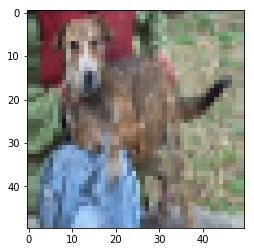

In [22]:
x,y = training_set.next()
for i in range(0,1):
    random_image = x[i]
    plt.imshow(random_image)
    plt.show()

In [23]:
classifier.fit_generator(training_set,
steps_per_epoch = 8000,
epochs = 25,
callbacks = acc_callback,
validation_data = test_set,
validation_steps = 2000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
 731/8000 [=>............................] - ETA: 27:06 - loss: 0.6207 - acc: 0.6488

KeyboardInterrupt: 

In [27]:
json_file = open('saved_models/cnn_base_model.json', 'r')

loaded_classifier_json = json_file.read()

json_file.close()

loaded_classifier = model_from_json(loaded_classifier_json)

loaded_classifier.load_weights("saved_models/cnn_base_model.h5")
print("Loaded model from disk")

loaded_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Loaded model from disk


In [28]:
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (50, 50))

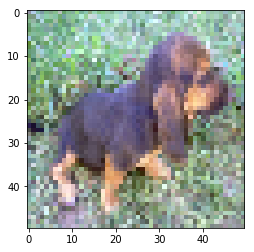

In [29]:
plt.imshow(test_image)
plt.show()

In [30]:
test_image = image.img_to_array(test_image)

In [31]:
test_image = np.expand_dims(test_image, axis = 0)

In [32]:
result = loaded_classifier.predict(test_image)

In [33]:
if result[0][0] == 1:
    prediction = 'This is a dog'
else:
    prediction = 'This is a cat'

In [34]:
print (prediction)

This is a dog


In [37]:
loss,accuracy = loaded_classifier.evaluate_generator(test_set, steps=50)

In [38]:
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.78


In [39]:
from keras.utils import plot_model
plot_model(classifier, to_file='classifier.png')

In [44]:
from quiver_engine import server
server.launch(loaded_classifier)

Starting webserver from: C:\ProgramData\Anaconda3\lib\site-packages\quiver_engine


::1 - - [2019-02-17 11:01:07] "GET /model HTTP/1.1" 200 2673 0.002001
::1 - - [2019-02-17 11:01:07] "GET /inputs HTTP/1.1" 200 216 0.000000
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\gevent\_ffi\loop.py", line 230, in python_check_callback
    def python_check_callback(self, watcher_ptr): # pylint:disable=unused-argument
KeyboardInterrupt
2019-02-17T05:31:15Z


KeyboardInterrupt: 